## Predict House Prices for Denton County using Supervised Learning algorithms: Decision Trees, Ensemble Methods, KNN, Linear Regression and identify the best model. 


**Predict House Prices**
The primary goal of this project is to forecast house prices for Denton County.
**
Identify key attribut**es
Determine main attributes that influence real estate p## s#### **.

Ins**ights
Build a property valuation tool that offers insights for home-owners, government, financial institutions and ors.t
rs. 


There are multiple models currently used by realtors, government and financial institutions to price a home at time of sale or appraise the value of a home.

What is missing is one model that everyone can access not only to understand the value of their home but also predict future values to assist investors and homeowners make decisions on whether to sell now or in the future.

This could be an alternative option for buyers and sellers to not only understand the value of homes but also compare how the value gets impacted by different factors such as: Living Area, Lot Size, City, Pool, Number of Bedrooms, Age of the house etc. 

Tools like Zillow are at 93% accuracy. If we can build a model with higher accuracy, it can be a viable product that can compete with the existing tools.


## Import Libraries

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

## SKLearn
import sklearn
from sklearn.linear_model import LogisticRegression

## SKLearn libraries for Decision Trees
from sklearn.tree import DecisionTreeClassifier

## Statsmodel Library for LogitReg
import statsmodels.api as sm

from collections import defaultdict

## Import Dataset for Housing prices and features for Denton County for the last 90 days. 
### This dataset is downloaded directly from the MLS Website (database of all houses sold maintained by real-estate agents) for last 90 days.

I used a similar dataset for Data Mining Project but did not have the neccessary Machine Learning knowledge and tools. Also some features like age were missing. Built a Linear regression with 81% accuracy.
Goal would be to build a better model and improve on the previous accuracy. Also analyze the input features with greater depth to understand the relationship.

In [428]:
loc = "MLS_ML.csv"
df = pd.read_csv(loc)

## Explore the Dataset

##### Number of Observations
##### Features, Names, Data types
##### Top 5 observations
##### Look at Min and Max values to understand outliers

In [429]:
print("No. of observations: ",df.shape[0])
print("No. of Features: ",df.shape[1])
print("Feature Names: ",df.columns)
print(f"Data types: ",df.dtypes.value_counts())
df.head(5)

No. of observations:  3348
No. of Features:  31
Feature Names:  Index(['#', 'ML #', 'Type', 'Mls Status', 'Standard Status', 'Address', 'City',
       'Subdivision Name', 'Days', 'CDOM', 'SqFt', 'Pool', 'Beds', 'Baths',
       'List Price', 'Waterfront YN', 'HOA Fee', 'Fencing', 'Flooring',
       'HOA Fee Includes', 'Lot Size', '# Parking Spaces', 'High School Name',
       'School District', 'Middle School Name', 'Elementary School Name',
       'Close Date', 'Close Price', 'Acres', 'Current Price', 'Yr Built'],
      dtype='object')
Data types:  object     16
int64      11
float64     4
Name: count, dtype: int64


,#,ML #,Type,Mls Status,Standard Status,Address,City,Subdivision Name,Days,CDOM,...,# Parking Spaces,High School Name,School District,Middle School Name,Elementary School Name,Close Date,Close Price,Acres,Current Price,Yr Built
0,1,20629970,Single Family,Closed,Closed,12430 Fm 2449,Ponder,2449 Estate,29,29,...,NaN,Ponder,Ponder ISD,NaN,Ponder,45499,450000,3.560,450000,2002.0
1,1,20560053,Single Family,Closed,Closed,7583 Borth Road,Sanger,5 Red Lightning Add,187,187,...,NaN,Krum,Krum ISD,Krum,Dyer,45566,700000,3.902,700000,2019.0
2,1,20686854,Single Family,Closed,Closed,401 Trigger Trail,Argyle,5t Ranch Ph 2,33,33,...,NaN,Argyle,Argyle ISD,Argyle,Hilltop,45569,950000,0.299,950000,2021.0
3,1,20677990,Single Family,Closed,Closed,409 Travelers Terrace,Argyle,5t Ranch Ph 2,6,6,...,NaN,Argyle,Argyle ISD,Argyle,Hilltop,45519,1100000,0.277,1100000,2021.0
4,1,20651387,Single Family,Closed,Closed,414 Appaloosa Run,Argyle,5t Ranch Ph One,6,6,...,NaN,Argyle,Argyle ISD,Argyle,Hilltop,45527,1300000,0.348,1300000,2017.0


In [442]:
df.describe()

,Days,CDOM,SqFt,Beds,Baths,List Price,HOA Fee,Close Date,Close Price,Acres,Current Price,Yr Built,price/sqft,Sale Price/List Price,Age
count,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3.191000e+03,2489.000000,3191.000000,3.191000e+03,3191.000000,3.191000e+03,3190.000000,3191.000000,3191.000000,3190.000000
mean,44.680978,68.827954,2533.246004,3.733939,2.978063,5.834594e+05,637.046203,45528.949546,5.556337e+05,0.220639,5.556315e+05,2008.674295,217.391084,1.313594,15.325705
std,51.616579,126.422882,903.918879,0.917116,1.049924,2.977499e+05,495.971025,25.855245,2.690004e+05,0.201863,2.690020e+05,16.214157,47.691173,19.270687,16.214157
min,0.000000,0.000000,764.000000,1.000000,1.000000,1.125000e+03,0.000000,45488.000000,2.600000e+03,0.002000,2.600000e+03,1923.000000,1.390000,0.010000,0.000000
25%,9.000000,10.000000,1840.500000,3.000000,2.000000,3.890000e+05,294.000000,45505.000000,3.729500e+05,0.137000,3.729500e+05,2000.000000,186.980000,0.930000,1.000000
50%,28.000000,33.000000,2346.000000,4.000000,3.000000,4.990000e+05,510.000000,45527.000000,4.750000e+05,0.165000,4.750000e+05,2015.000000,211.340000,0.970000,9.000000
75%,62.000000,74.000000,3112.500000,4.000000,4.000000,6.887955e+05,800.000000,45553.000000,6.573550e+05,0.216000,6.573550e+05,2023.000000,241.055000,1.000000,24.000000
max,650.000000,1071.000000,6630.000000,32.000000,7.000000,5.199000e+06,3660.000000,45576.000000,1.965000e+06,1.900000,1.965000e+06,2024.000000,639.530000,1088.890000,101.000000


## Clean up the data

##### Data Cleaning
Remove Duplicates, NAs, delete columns not needed: #, ML#, MLS Status, Standard Status, Type
##### Missing Values: 
Drop Waterfront and Parking Spaces since more than 50% records are missing.Drop 1 record with Pool feature missing.
##### Zero and Negative Values
70 records for Acres and 1 for Bedrooms with 0 value deleted. 
6 records that show Days on Market<0 removed.
##### Add new columns
Price/SqFt, Sale Price as a % of List Price, Age of the House



In [124]:
#df = df.drop_duplicates(subset = ['ML'],keep='last')
#print(df.dtypes)

In [430]:
df = df.drop(df.columns[[0, 1,2, 3,4,5]], axis=1)  # df.columns is zero-based pd.Index
df = df.drop('Waterfront YN',axis = 1)
df = df.drop('# Parking Spaces',axis = 1)
df = df[df.Acres.notnull()]
df = df[df["Pool"].notnull()]
df = df[df['Beds'] >0]
df = df[df['Acres'] >0]
df = df[df['Days'] >=0]
df['price/sqft'] = df['Close Price']/df['SqFt']
df['price/sqft'] = df['price/sqft'].apply(lambda x: round(x, 2))
df['Sale Price/List Price'] = df['Close Price']/df['List Price']
df['Sale Price/List Price'] = df['Sale Price/List Price'].apply(lambda x: round(x, 2))
df['Age'] = 2024 - df['Yr Built']


In [431]:
df.shape


(3270, 26)

### Split dataset into target variable, numerical predictors and categorical predictors


In [432]:
target1 = 'Close Price'
target2 = 'Days'
numeric = ['SqFt','Acres','Days','price/sqft','Sale Price/List Price','Age','Close Price']
x1 = ['SqFt','Acres','Days','price/sqft','Sale Price/List Price','Age'] ## Numerical Features
x2 = ['Pool','Beds','Baths','School District']
df_numeric = df[numeric]
df_numeric.head(3)

,SqFt,Acres,Days,price/sqft,Sale Price/List Price,Age,Close Price
0,1555,3.560,29,289.39,0.82,22.0,450000
1,3036,3.902,187,230.57,0.90,5.0,700000
2,3900,0.299,33,243.59,0.95,3.0,950000


### Look at the impact of predictors on the target variable. Study the strength of relationships between different attributes.
#### No significant multi collinearity present between the input features based on the heat map below.

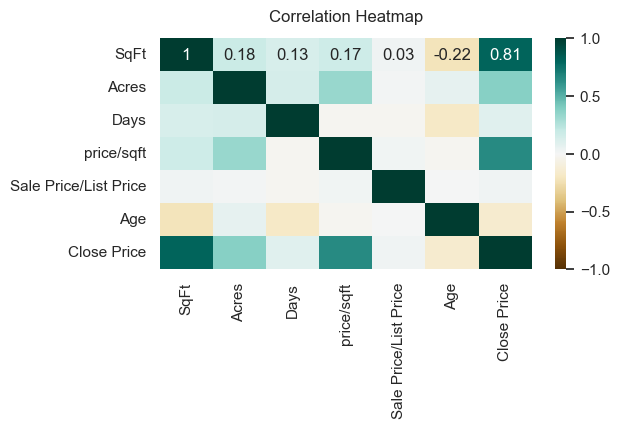

In [443]:
plt.figure(figsize=(6, 3))

heatmap = sns.heatmap(round(df_numeric.corr(),2),vmin = -1,vmax =1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


C:\Users\sorab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sorab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sorab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sorab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

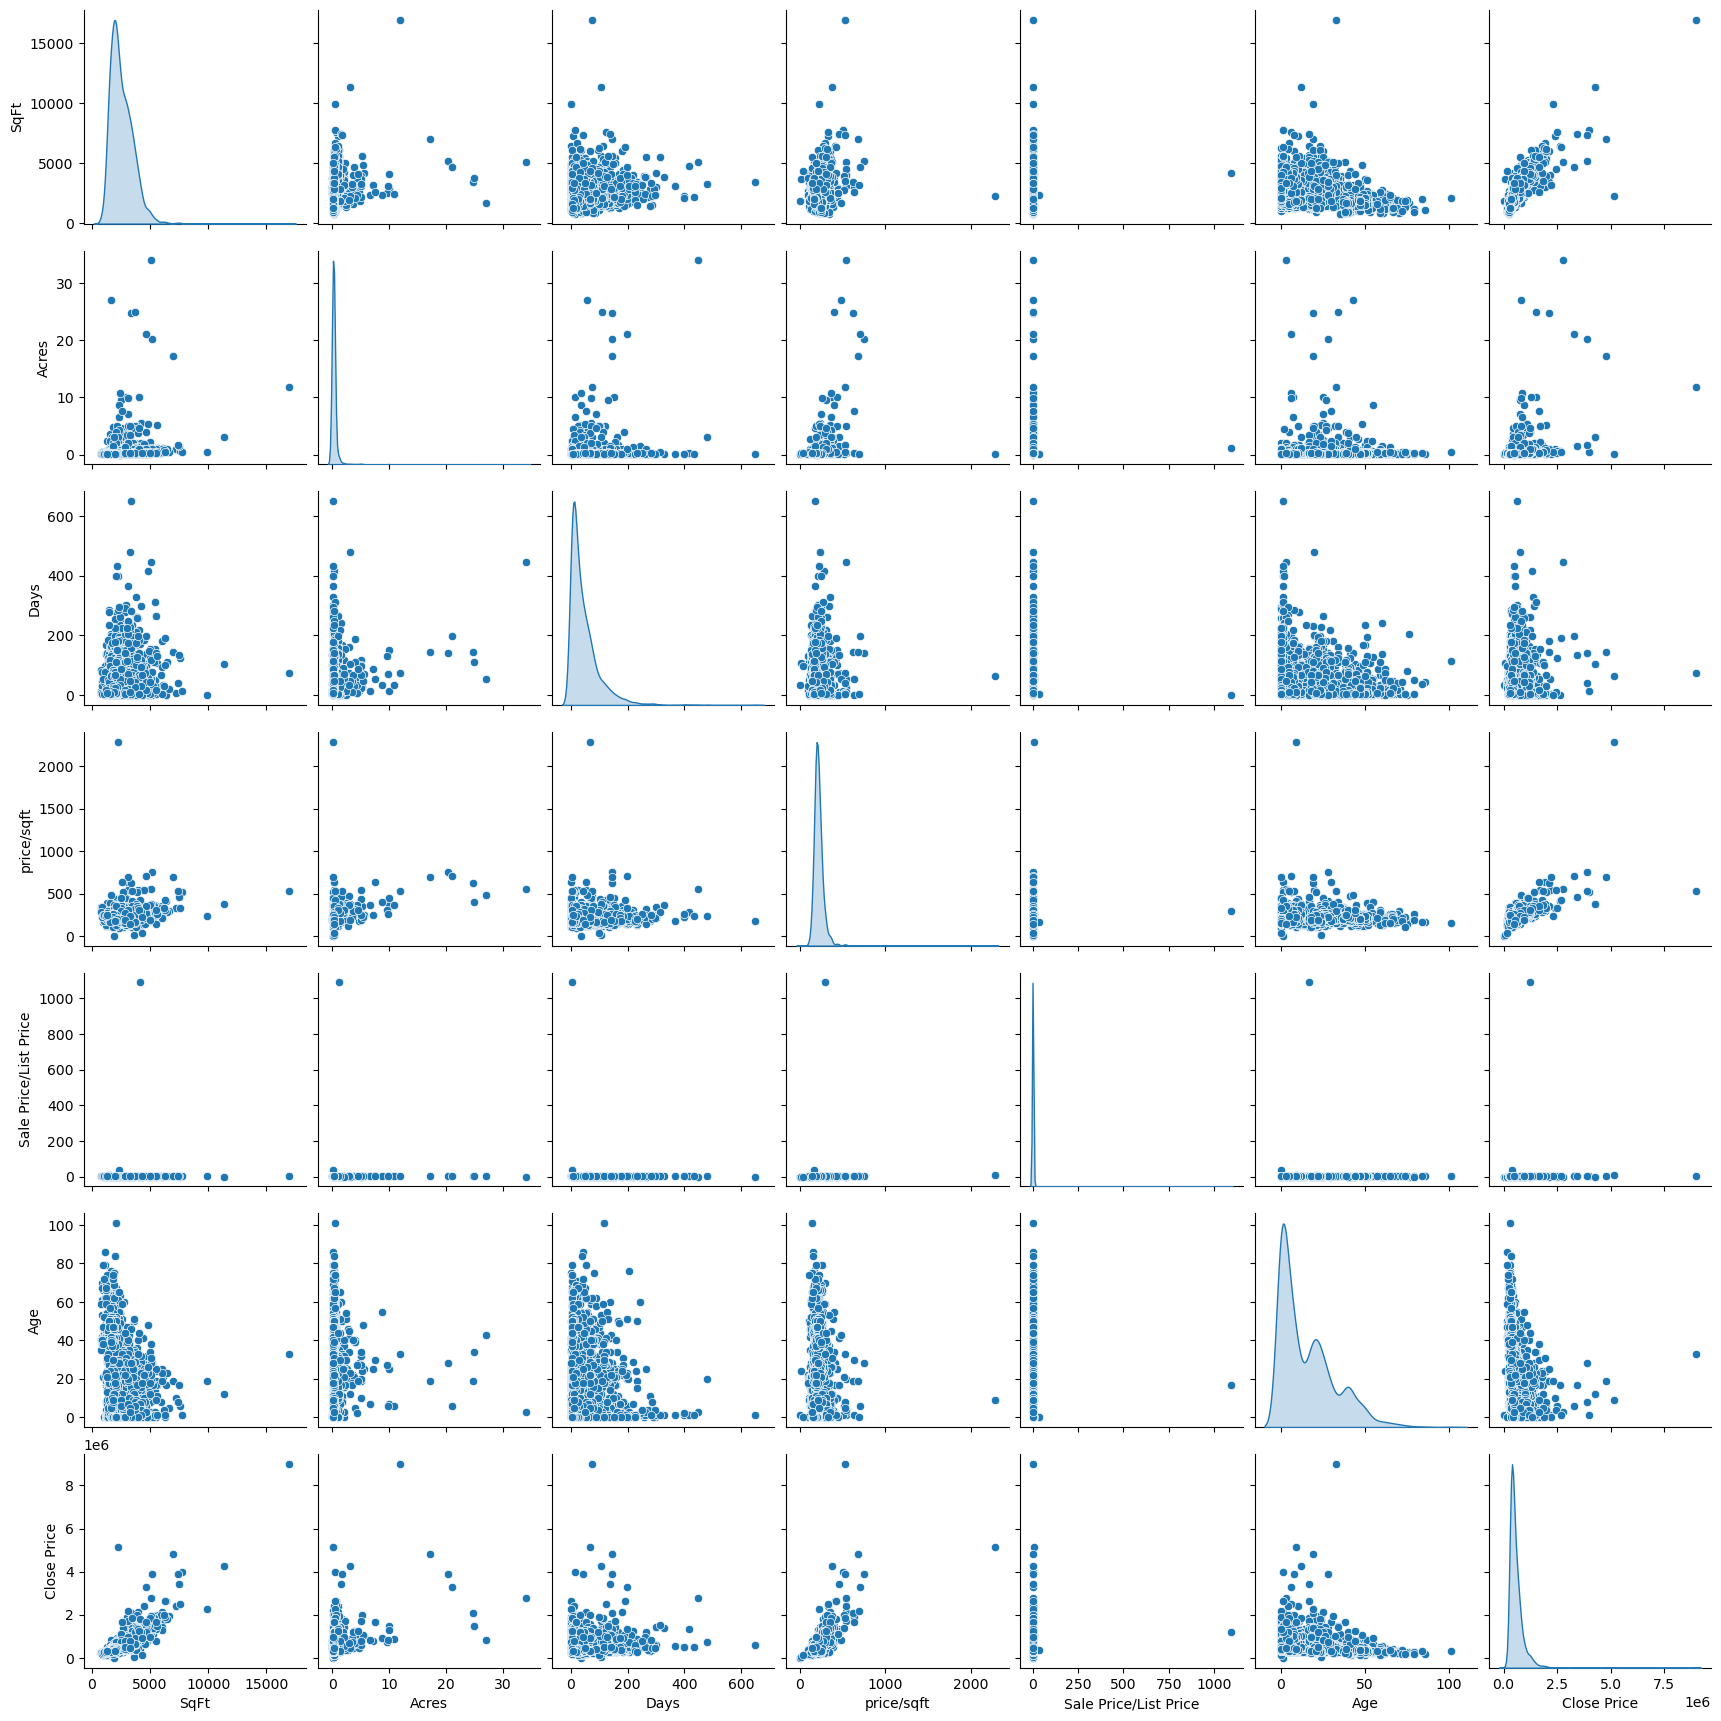

In [141]:
sns.pairplot(df_numeric,diag_kind = "kde")

### 1. SqFt and Price. Study relationship and remove Outliers

Text(0, 0.5, 'Price')

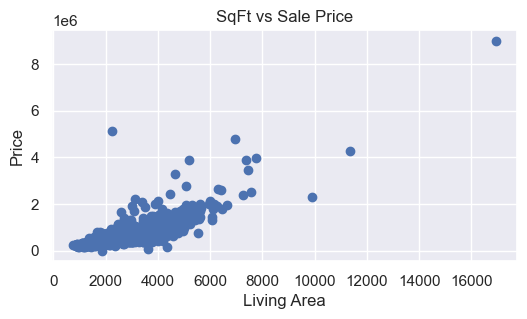

In [434]:
## Explore SqFt and Price
plt.figure(figsize=(6, 3))

plt.scatter(df['SqFt'],df['Close Price'])
plt.title('SqFt vs Sale Price')
plt.xlabel("Living Area")
plt.ylabel("Price")


### There are 3 outliers with Living Area above 8000 sqft.Lets remove them


Text(0, 0.5, 'Price')

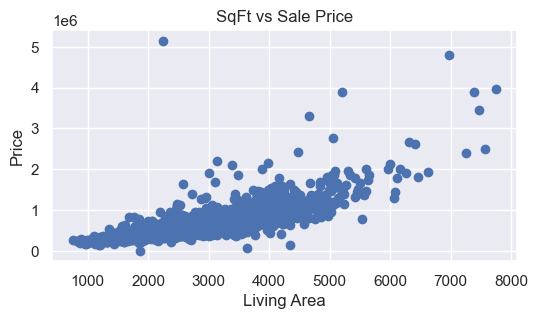

In [435]:
df = df[df["SqFt"]<8000]
plt.figure(figsize=(6, 3))

plt.scatter(df['SqFt'],df['Close Price'])
plt.title('SqFt vs Sale Price')
plt.xlabel("Living Area")
plt.ylabel("Price")


### 2. Land Size (Acres) and Price. Identify and remove outliers.

Text(0, 0.5, 'Price')

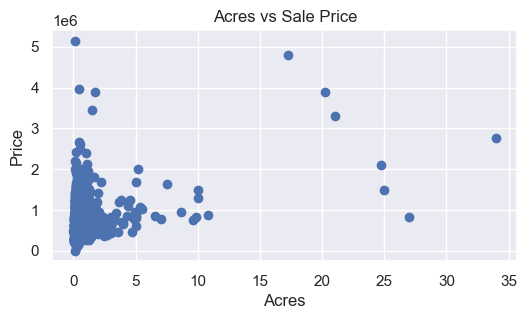

In [436]:
plt.figure(figsize=(6, 3))

plt.scatter(df['Acres'],df['Close Price'])
plt.title('Acres vs Sale Price')
plt.xlabel("Acres")
plt.ylabel("Price")


#### Remove records over 5 acres which show up as outliers. Used a series a scatter and box plots to identify those.

Text(0, 0.5, 'Price')

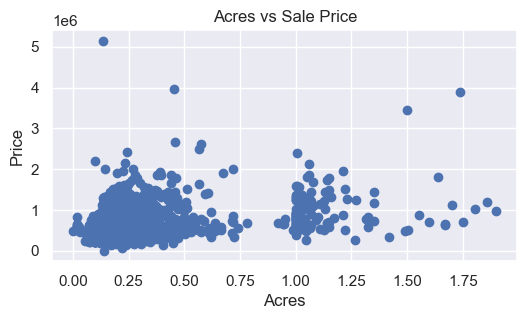

In [438]:
df = df[df["Acres"]<5]
plt.figure(figsize=(6, 3))

plt.scatter(df['Acres'],df['Close Price'])
plt.title('Acres vs Sale Price')
plt.xlabel("Acres")
plt.ylabel("Price")


### Box Plot of Sale Price to identify outliers.
13 records with Sale Price over 2 M are identified as outliers.


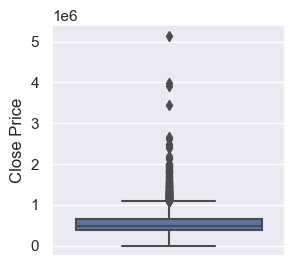

In [440]:
plt.figure(figsize=(3, 3))
sns.boxplot(y="Close Price", data=df)
plt.show()

In [441]:
print("Obs > 2M Sale Price: ",df[df["Close Price"]>2000000].City.count())
df = df[df["Close Price"]<2000000]
print(df.shape)

Obs > 2M Sale Price:  13
(3191, 26)


### 3. Pool: Review Box Plots for homes with and without pool. There is a definite impact of Pool on Home Prices. Avg. price/sqft higher by 26 dollars for homes that have a pool. Overall homes with pool have a Sale Price of 804k compared to 514 k for homes without pool.

Pool: Y 239.69 804198.22
Pool: N 213.67 514191.11


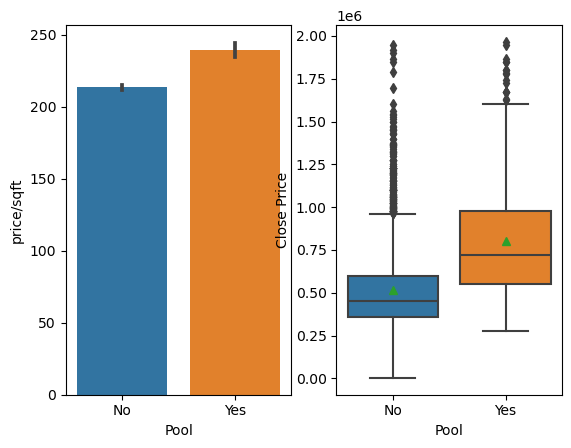

In [225]:

fig, axs = plt.subplots(ncols=2)
sns.barplot(x="Pool",
                    y="price/sqft",
                    data=df,ax = axs[0])

sns.boxplot(y="Close Price", x = "Pool",data=df,showmeans = True,ax = axs[1])
with_pool = round(df[df["Pool"]=="Yes"]["price/sqft"].mean(),2)
without_pool = round(df[df["Pool"]=="No"]["price/sqft"].mean(),2)
with_pool1 = round(df[df["Pool"]=="Yes"]["Close Price"].mean(),2)
without_pool1 = round(df[df["Pool"]=="No"]["Close Price"].mean(),2)

print("Pool: Y", with_pool,with_pool1)
print("Pool: N", without_pool,without_pool1)


### 4. Impact of number of Bedrooms on House prices

<Axes: xlabel='Beds', ylabel='Close Price'>

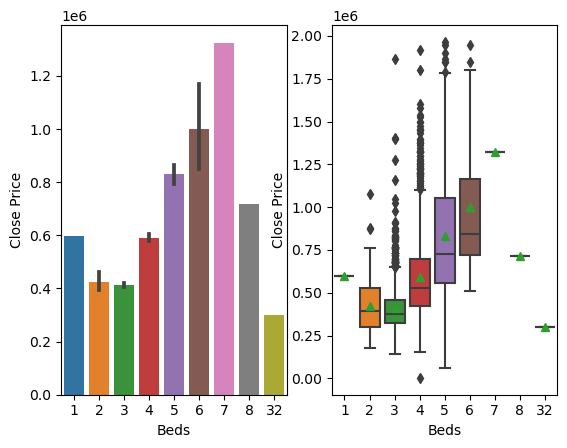

In [227]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(x="Beds",
                    y="Close Price",
                    data=df,ax = axs[0])

sns.boxplot(y="Close Price", x = "Beds",data=df,showmeans = True,ax = axs[1])


#### Looks like only 1 obs for 1, 7,8 and 32 bedrooms. Not enough information to consider in the model. Remove them. Beds>3 definitely impact the Sale Price positively

<Axes: xlabel='Beds', ylabel='Close Price'>

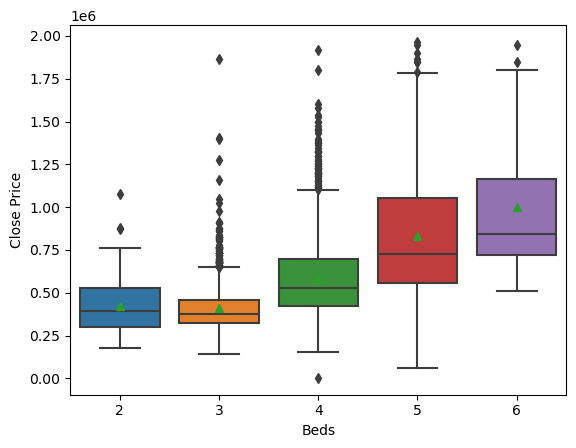

In [233]:
df = df[df["Beds"]>1]
df = df[df["Beds"]<=6]
sns.boxplot(y="Close Price", x = "Beds",data=df,showmeans = True)


### 5. Number of bathrooms definitely impact the Sale Price shown below

<Axes: xlabel='Baths', ylabel='Close Price'>

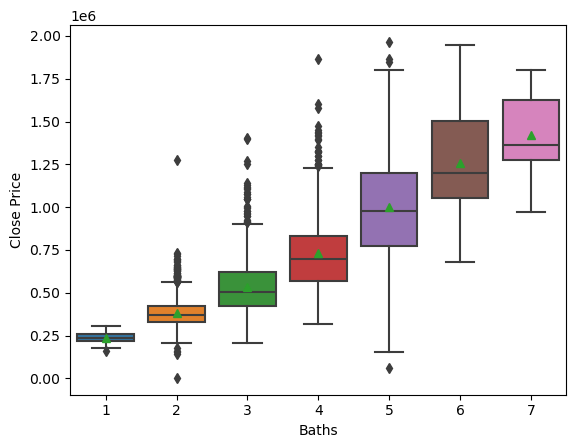

In [234]:
sns.boxplot(y="Close Price", x = "Baths",data=df,showmeans = True)


### 6. Age and House Prices

Text(0, 0.5, 'Price')

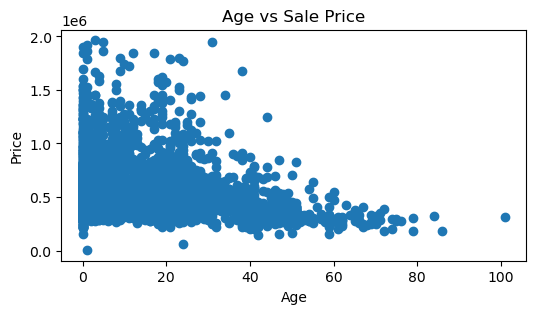

In [236]:
plt.figure(figsize=(6, 3))

plt.scatter(df['Age'],df['Close Price'])
plt.title('Age vs Sale Price')
plt.xlabel("Age")
plt.ylabel("Price")


#### Remove 3 outliers with age>80


In [238]:
df[df['Age']>80]
df = df[df['Age']<=80]

### 7. Days and House ...Not a strong relationship. Remove 6 outliers with days>365 (1 year)

Text(0, 0.5, 'Price')

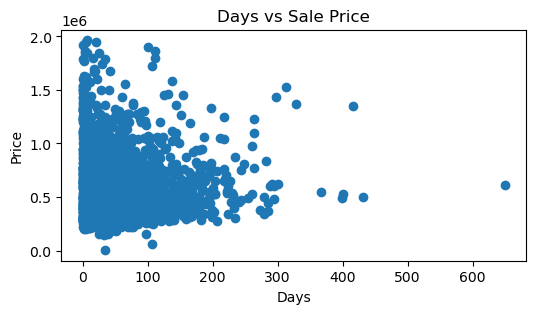

In [240]:
plt.figure(figsize=(6, 3))

plt.scatter(df['Days'],df['Close Price'])
plt.title('Days vs Sale Price')
plt.xlabel("Days")
plt.ylabel("Price")


In [242]:
df[df['Days']>365]
df = df[df['Days']<=365]

### 8. Data by School District....Remove school districts with count<30 (min sample size needed is 30).....Ponder and Celina ISDs removed.
#### Look at boxplot to see if price/sqft varies based on School District.

In [260]:
df_isd = df.groupby('School District').count()['City']
print(df_isd)
isd_remove = ['Ponder ISD', 'Celina ISD']
df = df[~df['School District'].isin(isd_remove)]


School District
Argyle ISD                       164
Aubrey ISD                       140
Carrollton-Farmers Branch ISD    113
Denton ISD                       761
Frisco ISD                       264
Krum ISD                          53
Lake Dallas ISD                   70
Lewisville ISD                   675
Little Elm ISD                   228
Northwest ISD                    481
Pilot Point ISD                   34
Prosper ISD                      131
Sanger ISD                        45
Name: City, dtype: int64


(3159, 26)

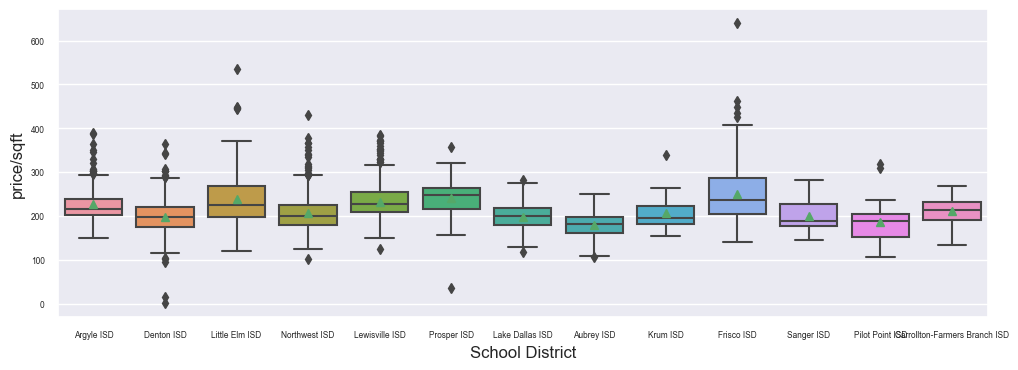

In [281]:
sns.set(rc={"figure.figsize":(12, 4)}) #width=3, #height=4
sns.boxplot(y="price/sqft", x = "School District",data=df,showmeans = True)
plt.tick_params(axis='both', which='major', labelsize=6)


### 9. Data by City....Remove cities with sample size < 30....Variance in mean prices based on City.

In [267]:
df_city = df.groupby('City').count()['School District']
print(df_city)
city_remove = ['Copper Canyon', 'Cross Roads','Dallas','Double Oak','Haslet','Hickory Creek','Krugerville','Lake Dallas',
               'Lakewood Village','New Fairview','Plano','Ponder','Rhome','Savannah','Shady Shores','Southlake']
df = df[~df['City'].isin(city_remove)]
print(df.shape)

City
Argyle                133
Aubrey                213
Carrollton            181
Celina                 35
Corinth                68
Denton                335
Flower Mound          216
Fort Worth            163
Frisco                284
Highland Village       53
Justin                 99
Krum                   38
Lantana                35
Lewisville            194
Little Elm            299
Northlake             124
Oak Point              54
Pilot Point            34
Prosper                90
Providence Village     57
Roanoke                33
Sanger                 45
The Colony            138
Trophy Club            46
Name: School District, dtype: int64
(2967, 26)


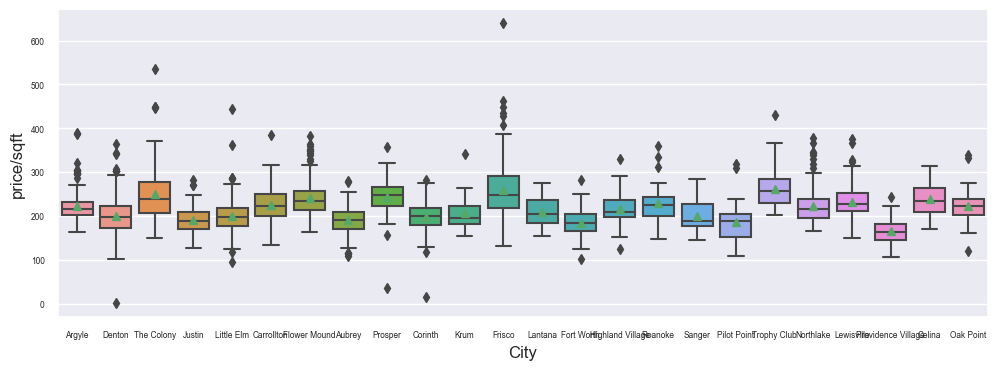

In [282]:
sns.set(rc={"figure.figsize":(12, 4)}) #width=3, #height=4
sns.boxplot(y="price/sqft", x = "City",data=df,showmeans = True)
plt.tick_params(axis='both', which='major', labelsize=6)


### Box Plot of price/sqft to identify outliers....4 observations with price/sqft<100 and 3 observations wityh price/sqft > 450.On further review Close Price is incorrect on the outliers<100. Not sure on observations with price/sqft>450 but deleting them pending further review.

,City,Subdivision,Days,CDOM,SqFt,Pool,Beds,Baths,List Price,HOA Fee,...,Middle School Name,Elementary School Name,Close Date,Close Price,Acres,Current Price,Yr Built,price/sqft,Sale Price/List Price,Age
222,Denton,Cambridge Brook Ph 1,34,34,1870,No,4,2,410000,500.0,...,Mcmath,Borman,45498,2600,0.138,2600,2023,1.39,0.01,1
598,Corinth,Eagle Pass At Oakmont,107,107,3640,No,5,5,600000,400.0,...,Crownover,Hawk,45560,58000,0.222,58000,2000,15.93,0.10,24
2377,Little Elm,Spiritas Ranch,18,18,2371,No,4,3,450999,900.0,...,Rodriguez,Providence,45565,226999,0.157,226999,2024,95.74,0.50,0
3215,Prosper,Windsong Ranch,98,98,4351,No,4,5,1246900,147.0,...,William Rushing,Mrs. Jerry Bryant,45568,154715,0.240,154715,2024,35.56,0.12,0


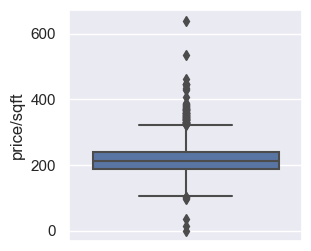

In [294]:
plt.figure(figsize=(3, 3))
sns.boxplot(y="price/sqft", data=df)
df[df['price/sqft']<100]
#df[df['price/sqft']>450]

In [296]:
df = df[df['price/sqft']>100]
df = df[df['price/sqft']<450]
print(df.shape)

(2960, 26)


### Set up for Data Modeling: Decision Tree Regression and Linear Regression
#### Split the data into training and test set
#### Encode categorical variables for both Linear Regression and Decision Trees


In [306]:
from sklearn.model_selection import train_test_split

target1 = 'Close Price'
x_features = ['SqFt','Acres','Days','Age','Pool','School District','City','Beds','Baths']
x = df[x_features]
y = df[target1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head()

,SqFt,Acres,Days,Age,Pool,School District,City,Beds,Baths
3303,1930,0.152,6,47,No,Carrollton-Farmers Branch ISD,Carrollton,3,2
691,2090,0.575,17,4,No,Pilot Point ISD,Pilot Point,3,3
1806,4987,0.179,20,10,No,Frisco ISD,Frisco,4,4
2147,2719,1.064,17,2,Yes,Sanger ISD,Sanger,4,3
3344,4301,0.208,68,18,Yes,Frisco ISD,Frisco,4,5


In [312]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

x_train_encoded = encoder.fit_transform(x_train[['Pool','School District','City']])
x_train_combined = np.hstack((x_train_encoded.toarray(), x_train[['SqFt','Acres','Days','Age','Beds','Baths']].values))

x_test_encoded = encoder.fit_transform(x_test[['Pool','School District','City']])
x_test_combined = np.hstack((x_test_encoded.toarray(), x_test[['SqFt','Acres','Days','Age','Beds','Baths']].values))


### Fit a Decision Tree to the data

In [314]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(x_train_combined, y_train)


DecisionTreeRegressor()

#### Do a Grid Search to find the best hyperparameters

In [315]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(regressor, param_grid, cv=5)

# Perform the grid search on the training data
grid_search.fit(x_train_combined, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

### Update DT with best parameters and make predictions

In [366]:
regressor = DecisionTreeRegressor(max_depth=10,min_samples_leaf = 4,min_samples_split=10)
regressor.fit(x_train_combined, y_train)
yhat = regressor.predict(x_train_combined)
y_pred = regressor.predict(x_test_combined)


### Evaluate the model

In [367]:
from sklearn.metrics import r2_score

print("Training Accuracy: ",r2_score(yhat, y_train))
print("Test Accuracy: ",r2_score(y_pred, y_test))

Training Accuracy:  0.8911082581800954
Test Accuracy:  0.7446382918533152


### Build a Random Forest

In [382]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42,max_depth=10,min_samples_leaf = 4,min_samples_split=10)
rf.fit(x_train_combined,y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [383]:
yhat = rf.predict(x_train_combined)
y_pred = rf.predict(x_test_combined)

print("Training Accuracy: ",r2_score(yhat, y_train))
print("Test Accuracy: ",r2_score(y_pred, y_test))

Training Accuracy:  0.8892751090111396
Test Accuracy:  0.8117020374720639


### Boosted Tree

In [398]:
from sklearn.datasets import make_regression

from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0,max_depth=5,min_samples_leaf=4,min_samples_split=10)
reg.fit(x_train_combined, y_train)


GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                          random_state=0)

In [399]:
yhat = reg.predict(x_train_combined)
y_pred = reg.predict(x_test_combined)

print("Training Accuracy: ",r2_score(yhat, y_train))
print("Test Accuracy: ",r2_score(y_pred, y_test))

Training Accuracy:  0.9506100671757239
Test Accuracy:  0.8731505991129604


### Linear Regression

In [368]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression().fit(x_train_combined, y_train)
yhat = model.predict(x_train_combined)
y_pred = model.predict(x_test_combined)

print("Training Accuracy: ",r2_score(yhat, y_train))
print("Test Accuracy: ",r2_score(y_pred, y_test))

Training Accuracy:  0.80770269339053
Test Accuracy:  0.8042450368925369


### Linear Model updated after removing Days and School District

In [401]:
x_train_encoded = encoder.fit_transform(x_train[['Pool','City']])
x_train_combined = np.hstack((x_train_encoded.toarray(), x_train[['SqFt','Acres','Age','Beds','Baths']].values))

x_test_encoded = encoder.fit_transform(x_test[['Pool','City']])
x_test_combined = np.hstack((x_test_encoded.toarray(), x_test[['SqFt','Acres','Age','Beds','Baths']].values))


model = LinearRegression().fit(x_train_combined, y_train)


In [402]:
yhat = model.predict(x_train_combined)
y_pred = model.predict(x_test_combined)

print("Training Accuracy: ",r2_score(yhat, y_train))
print("Test Accuracy: ",r2_score(y_pred, y_test))

Training Accuracy:  0.8017793065877898
Test Accuracy:  0.7963353110891649


### KNN Model

In [408]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train_combined, y_train)


KNeighborsRegressor(n_neighbors=3)

In [409]:
yhat = model.predict(x_train_combined)
y_pred = model.predict(x_test_combined)

print("Training Accuracy: ",r2_score(yhat, y_train))
print("Test Accuracy: ",r2_score(y_pred, y_test))

Training Accuracy:  0.8258750904288832
Test Accuracy:  0.686964121715374


### Summary
**Problem Statement:** Predict House Prices for Denton County
___
**Motivation:** Did a project in Data Miming course where I came up with 81% accuracy. Now with a much stronger understanding of ML models wanted to see if I can improve on the basic analysis and predictions I did before.
___
**Dataset:** Houses sold in Denton County for last 90 days downloaded from MLS Website
___
**Data Cleanup and Transformation:** Duplicates, missing records, zero and negative values and outliers removed. Removed data for cities and school district with less than 30 sample size.
___
**Features Identification:** Based on correlation and statistical analysis, Living Area(SqFt), Land size(Acres), number of Bedrooms,number of Bathrooms, Age of the House, Pool and City identified as strong predictors and Days on the Market & School District identified as weak predictors.
___
**Data Modeling:** Ran Linear Regression, Decision Tree, Random Forest, Boosted Trees and KNN models. Below is the summary

**Decision Tree** Training Accuracy  = 89.1% and Test Accuracy = 74.5%<br>
**Random Forest** Training Accuracy  = 88.9% and Test Accuracy = 81.2%<br>
**Boosted DT** "Training Accuracy  = 95.1% and Test Accuracy = 87.3%<br>
**Linear Regression** "Training Accuracy  = 80.2% and Test Accuracy = 79.6%<br>
**KNN** "Training Accuracy  = 82.6% and Test Accuracy = 68.7%<br>

The best model is Boosted Decision Tree with 87.3% accuracy on test data.